# Saturdays AI Bilbao
# Lyrics
# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import seaborn as sns
import missingno as msno

In [2]:
tracks_df = pd.read_csv("tracks.csv")
artists_df = pd.read_csv("artists.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'artists.csv'

In [ ]:
artists_df.head()

In [ ]:
tracks_df.head()

In [ ]:
print(tracks_df.columns)

#### Columns and their meanings
id: id of track \
name: name of track\
popularity: popularity of track in range 0 to 100\
duration_ms: duration of songs in ms\
explicit: whether it contains explicit content or not\
artists: artists who created the track\
id_artists: id of artists who created the track\
release_date: date of release\
danceability: how danceable a song is in range 0 to 1\
energy: how energized a song is in range 0 to 1\
key: major note of track [0: C, 1: C#/Db, 2: D, …]\
loudness: how loud a song is in db\
mode: the modality of track, 0 if minor and 1 if major\
speechiness: the presence of spoken words in track in range 0 to 1\
acousticness: how acoustic a track is in range 0 to 1\
instrumentalness: the absence of vocal sounds in track in range 0 to 1\
liveness: the presence of audience in track in range 0 to 1\
valence: the positiveness of the track in range 0 to 1\
tempo: the overall tempo of track in BPM\
time_signature: the time signature (4 in almost every track)\

In [ ]:
print(tracks_df.shape)

In [ ]:
tracks_df.describe()

In [ ]:
tracks_df.info()

In [ ]:
print(tracks_df.isna().sum())

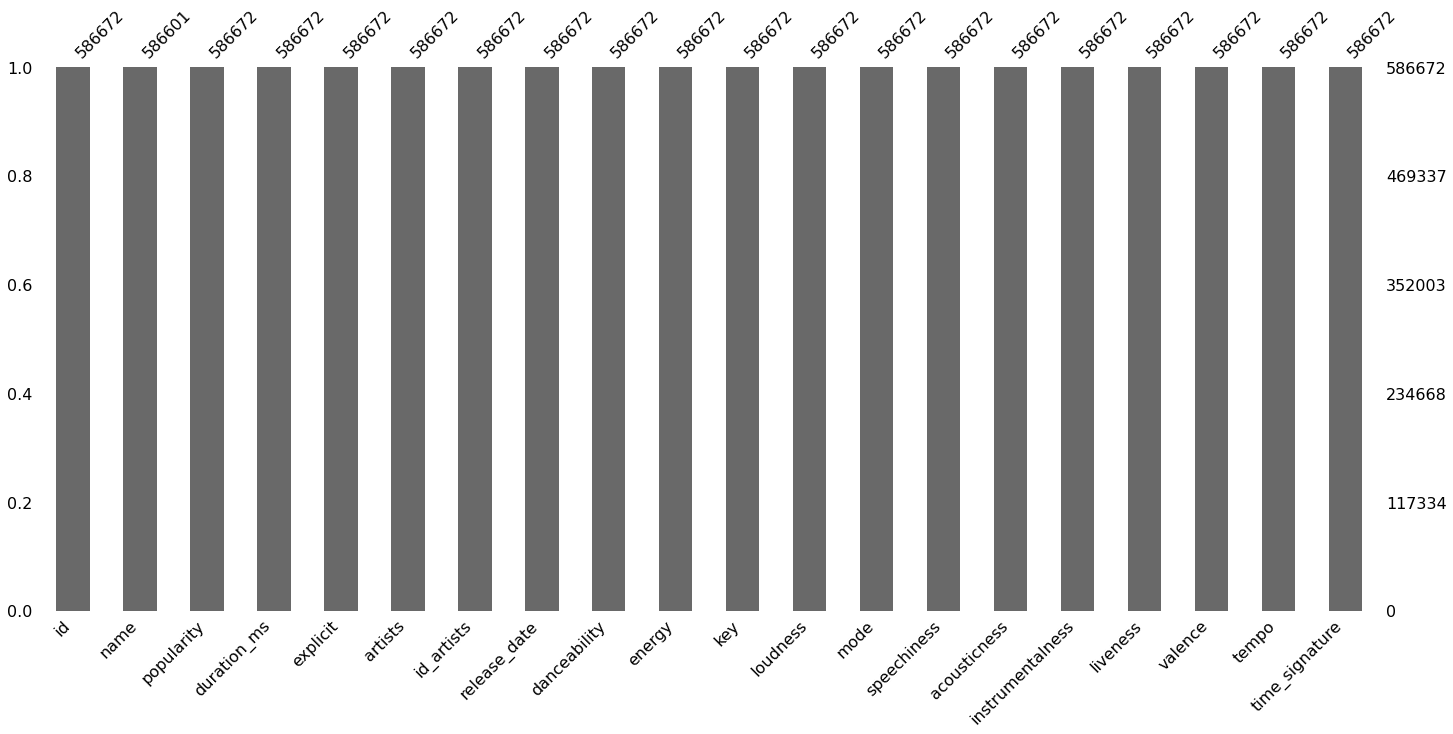

In [10]:
msno.bar(tracks_df)
plt.show()

In [3]:
tracks_df['tempo'].mean()

118.46485662687157

#### Transformando la columna de release date a solo año, porque hay muchos rows con solo el año de salida

In [4]:
tracks_df['release_date'].head(10)

0    1922-02-22
1    1922-06-01
2    1922-03-21
3    1922-03-21
4          1922
5          1922
6          1922
7          1922
8          1922
9    1922-03-29
Name: release_date, dtype: object

In [5]:
tracks_df['release_date'] = pd.to_datetime(tracks_df['release_date'])

In [6]:
tracks_df['release_date'].head(10)

0   1922-02-22
1   1922-06-01
2   1922-03-21
3   1922-03-21
4   1922-01-01
5   1922-01-01
6   1922-01-01
7   1922-01-01
8   1922-01-01
9   1922-03-29
Name: release_date, dtype: datetime64[ns]

In [7]:
tracks_df['release_year'] = pd.DatetimeIndex(tracks_df['release_date']).year

In [8]:
tracks_df['release_year'].astype(int) 

0         1922
1         1922
2         1922
3         1922
4         1922
          ... 
586667    2020
586668    2020
586669    2020
586670    2021
586671    2015
Name: release_year, Length: 586672, dtype: int64

In [9]:
tracks_df['release_year'].head()

0    1922
1    1922
2    1922
3    1922
4    1922
Name: release_year, dtype: int64

In [10]:
tracks_df.drop(['release_date'], axis=1, inplace=True)

In [11]:
artists = tracks_df['artists'].unique().tolist()

#### Transformando la columna de key o nota, de números a nombres de notas más entendibles

In [12]:
tracks_df["key"].unique()

array([ 0,  1,  7,  3,  5,  4,  6, 11,  2,  8, 10,  9])

In [13]:
key_values = {0: "C", 1: "C#/Db", 2: "D", 3: "D#/Eb", 4: "E", 5: "F", 6: "F#/Gb", 7: "G", 8: "G#/Ab", 9: "A", 10: "A#/Bb", 11: "B"}

In [14]:
tracks_df2 = tracks_df.replace({"key": key_values})

In [15]:
tracks_df2["key"].unique()

array(['C', 'C#/Db', 'G', 'D#/Eb', 'F', 'E', 'F#/Gb', 'B', 'D', 'G#/Ab',
       'A#/Bb', 'A'], dtype=object)

In [16]:
tracks_df2["key"].value_counts().max()

74950

#### Matriz de correlación

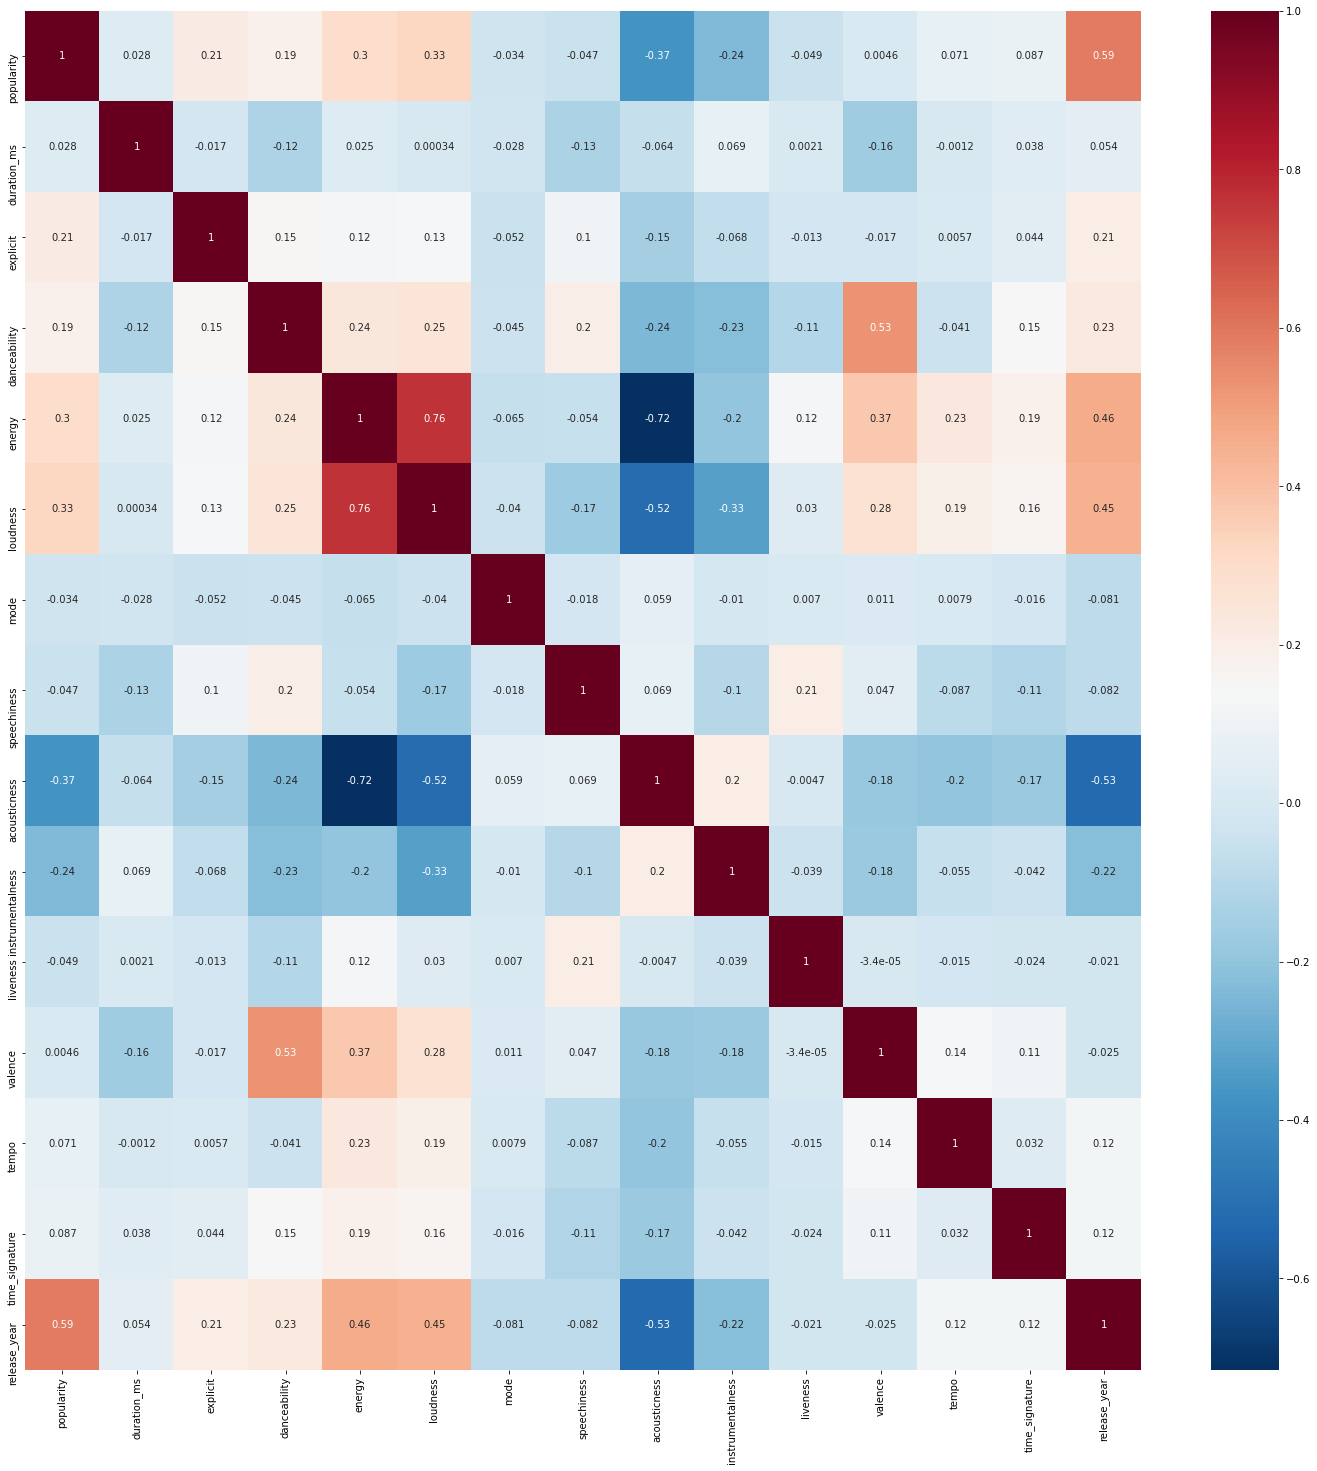

In [188]:
corrMatrix = tracks_df2.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corrMatrix, annot=True, cmap="RdBu_r")
plt.show()

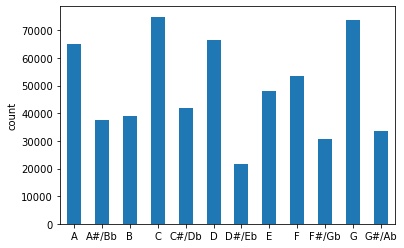

In [189]:
tracks_df2["key"].value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count')
plt.show()

#### Se puede ver que los tonos más populares son Do,La, Fa y Sol. Mientras que los semitonos no son los menos populares para componer canciones

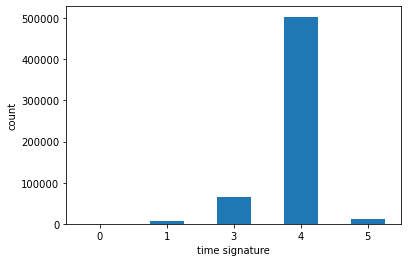

In [190]:
tracks_df2["time_signature"].value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count', xlabel='time signature')
plt.show()

#### Generalmente la música popular está escrita en compases de 4 tiempos y es lo que se puede comprobar en este gráfico

<AxesSubplot:xlabel='tempo', ylabel='Count'>

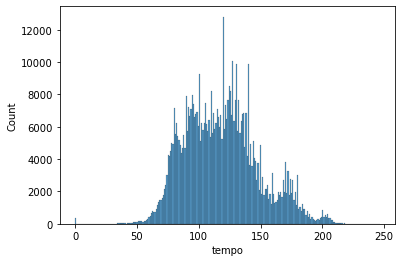

In [191]:
sns.histplot(data=tracks_df2, x="tempo")

In [192]:
tracks_df2[tracks_df2["tempo"] > 0].mode(numeric_only=True)

,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,0,240000,0,0.637,0.526,-8.026,1,0.0312,0.995,0.0,0.111,0.961,128.003,4,2020


El tempo entre 120 y 130 BPM, es lo que más utiliza en la múica moderna

<AxesSubplot:xlabel='key', ylabel='valence'>

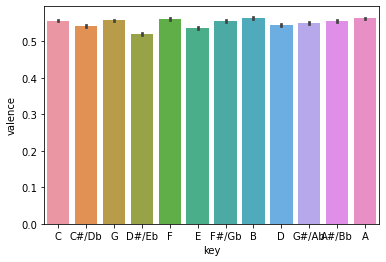

In [193]:
sns.barplot(data=tracks_df2, x="key", y="valence")

<AxesSubplot:xlabel='key', ylabel='danceability'>

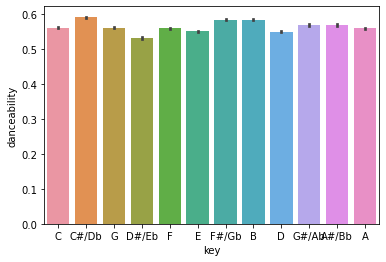

In [194]:
sns.barplot(data=tracks_df2, x="key", y="danceability")

<AxesSubplot:xlabel='key', ylabel='energy'>

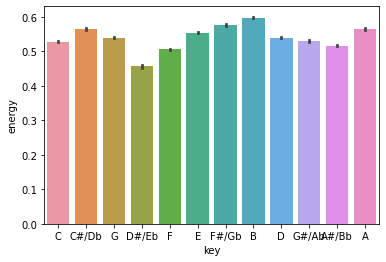

In [195]:
sns.barplot(data=tracks_df2, x="key", y="energy")

<AxesSubplot:xlabel='mode', ylabel='valence'>

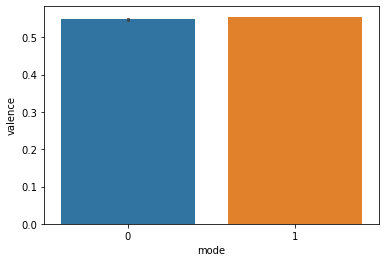

In [196]:
sns.barplot(data=tracks_df2, x="mode", y="valence")

#### No hay una gran relación entre la positividad de una canción y su tono o modalidad, siendo mayor o menor

<AxesSubplot:xlabel='loudness', ylabel='valence'>

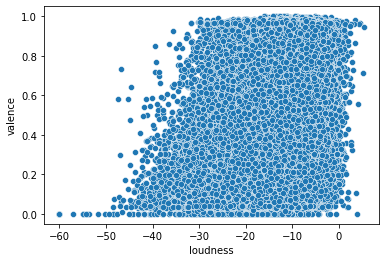

In [197]:
sns.scatterplot(data=tracks_df2, x="loudness", y="valence")

#### Hay un cierto patrón en que las canciones poco ruidosas son menos positivas y despúes de cierto aumento en el ruido, va aumentando la positivad

<AxesSubplot:xlabel='release_year', ylabel='popularity'>

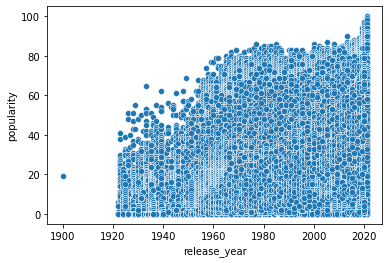

In [198]:
sns.scatterplot(data=tracks_df2, x="release_year", y="popularity")

#### La popularidad de la música más antigua es la más baja y la más nueva es la más popular

<AxesSubplot:xlabel='loudness', ylabel='danceability'>

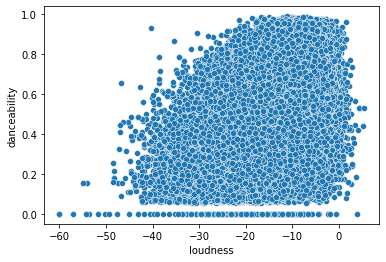

In [199]:
sns.scatterplot(data=tracks_df2, x="loudness", y="danceability")

#### Existe un patron en que las canciones más bailables están después de cierto nivel de escándalo

<AxesSubplot:xlabel='tempo', ylabel='danceability'>

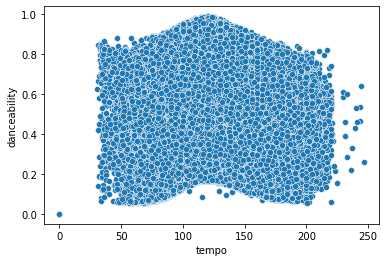

In [200]:
sns.scatterplot(data=tracks_df2, x="tempo", y="danceability")

#### Si la musica es muy lenta o rápida es menos bailable, el tempo para que se haga mejor para esto es entre 100 a 130 bpm

<AxesSubplot:xlabel='tempo', ylabel='valence'>

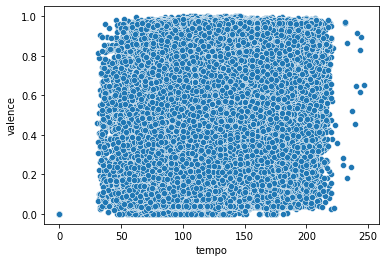

In [201]:
sns.scatterplot(data=tracks_df2, x="tempo", y="valence")

In [130]:
#tracks_df3 = tracks_df2.copy()

#### Se carga el dataset con las lyrics con el que se va a trabajar, este dataset contiene las letras de las canciones y esta reducido, para reducir tiempos de computación y realizar la prueba de concepto de forma ágil

In [23]:
df_all_songs = pd.read_excel("all_songs.xlsx")

In [24]:
df_all_songs.head()

,artists,LYRICS,id,name,popularity,duration_ms,explicit,id_artists,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,['O.C.'],from the national weather service. there is a ...,3kCeMR9l6jNQCt8jWHCy2B,Time's Up,50.0,205613.0,1.0,['5XI6qfoZSiEYtmItjfEX1Q'],0.664,0.621,...,-6.521,1.0,0.0671,0.16200,0.069400,0.353,0.489,89.566,4.0,1994.0
1,['guardin'],", feel the weight in my age, should i drink an...",78cIbVjU1xn7mbQ9i35avl,i think you're really cool,71.0,160661.0,0.0,['6zqcGQ6MH6yetBUoquMnL7'],0.503,0.446,...,-6.279,1.0,0.0547,0.90400,0.000000,0.303,0.476,174.062,4.0,2018.0
2,['blackbear'],"you're like perfection, some kind of holiday, ...",6y6jbcPG4Yn3Du4moXaenr,idfc,80.0,245172.0,1.0,['2cFrymmkijnjDg9SS92EPM'],0.630,0.500,...,-8.755,0.0,0.0611,0.61100,0.000040,0.114,0.315,144.871,4.0,2015.0
3,['Aimer'],"oh, um, money changes everything, if i could k...",0f34MnV51uwA1jhPQ2XnDe,Brave Shine,63.0,233493.0,0.0,['0bAsR2unSRpn6BQPEnNlZm'],0.365,0.893,...,-5.912,0.0,0.0909,0.00307,0.000007,0.141,0.460,171.080,4.0,2015.0
4,['potsu'],remember i'm the one who didn't have a lot to ...,3NsuucK8qXpIJf7KPZX7vq,i'm closing my eyes,73.0,118302.0,0.0,['5XE0fiZWGbq9TcSuWwJ1fA'],0.895,0.109,...,-13.853,0.0,0.0996,0.53400,0.549000,0.106,0.546,134.067,4.0,2017.0


In [25]:
df_all_songs.shape

(109, 21)